In [11]:
!pip install -q kaggle


In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhoopsingh93966","key":"f8b55520595eee5c93cf77f4e3a6922e"}'}

In [14]:
!cp kaggle.json ~/.kaggle/


In [15]:
!chmod 600 ~/.kaggle/kaggle.json


In [16]:
!pip install kaggle


In [17]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset


Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
 98% 775M/788M [00:10<00:00, 172MB/s]
100% 788M/788M [00:10<00:00, 80.2MB/s]


In [18]:
import zipfile
import os

os.makedirs('cats-vs-dogs', exist_ok=True)

with zipfile.ZipFile('microsoft-catsvsdogs-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('cats-vs-dogs')

In [19]:
!ls cats-vs-dogs/PetImages


Cat  Dog


In [20]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [21]:
def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = 1 if 'Dog' in folder else 0  # 1 for dog, 0 for cat
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return images, labels

In [22]:
# Load train images
cats_folder = 'cats-vs-dogs/PetImages/Cat'
dogs_folder = 'cats-vs-dogs/PetImages/Dog'

cat_images, cat_labels = load_images_from_folder(cats_folder)
dog_images, dog_labels = load_images_from_folder(dogs_folder)

X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

# Normalize the images
X = X / 255.0
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Flatten the images
X_flattened = X.reshape(X.shape[0], -1)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y_encoded, test_size=0.2, random_state=42)


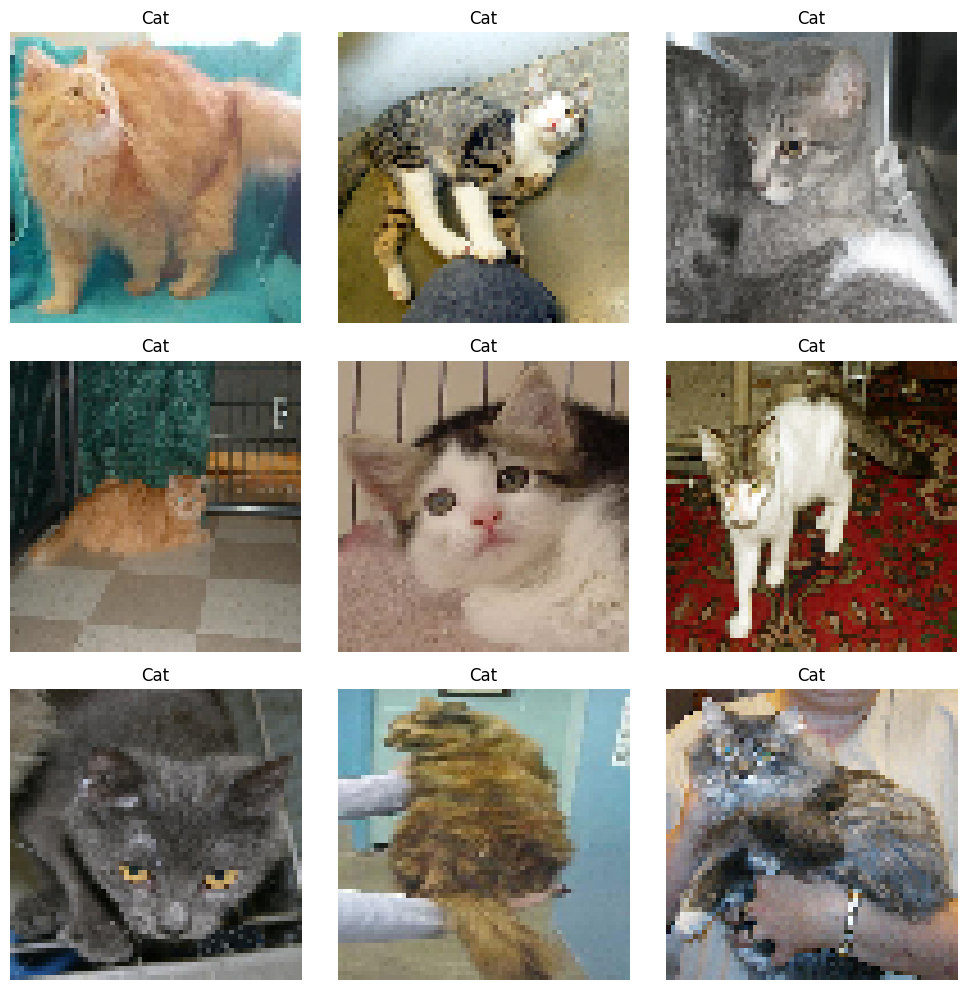

In [23]:

import cv2
import os
import matplotlib.pyplot as plt

def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            img = cv2.resize(img, img_size)
            images.append(img)
    return images

# Paths to the dataset folders
cats_folder = 'cats-vs-dogs/PetImages/Cat'
dogs_folder = 'cats-vs-dogs/PetImages/Dog'

# Load cat and dog images
cat_images = load_images_from_folder(cats_folder)
dog_images = load_images_from_folder(dogs_folder)

# Plotting a grid of images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    if i < len(cat_images):
        plt.imshow(cat_images[i])
        plt.title('Cat')
    else:
        plt.imshow(dog_images[i - len(cat_images)])
        plt.title('Dog')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [24]:
# Step 1: Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 2: Subset Selection
X_train_subset = X_train_pca[:1000]
y_train_subset = y_train[:1000]


# Step 3: Train the SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_subset, y_train_subset)

SVC(kernel='linear', probability=True)

In [25]:
SVC(kernel='linear', probability=True)


SVC(kernel='linear', probability=True)

In [26]:
# Step 4: Evaluation
y_pred = svm.predict(X_test_pca)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.55      0.44      0.49      2547
           1       0.52      0.63      0.57      2443

    accuracy                           0.53      4990
   macro avg       0.53      0.53      0.53      4990
weighted avg       0.54      0.53      0.53      4990

Accuracy: 0.5316633266533066
